In [2]:
# !wget "https://drive.google.com/file/d/1K7bbHWIJBybX2LoxKJJjzUqWBVTsHkd_/view?usp=drive_link"

#Download Dataset from Google Drive

# Library import

In [3]:
import gdown
import os
import zipfile

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url ="https://drive.google.com/file/d/1K7bbHWIJBybX2LoxKJJjzUqWBVTsHkd_/view?usp=sharing"

In [6]:
file_id = url.split("/")[-2]
file_id

'1K7bbHWIJBybX2LoxKJJjzUqWBVTsHkd_'

In [7]:
prefix ='https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "Resume_Dataset.zip")

Downloading...
From: https://drive.google.com/uc?/export=download&id=1K7bbHWIJBybX2LoxKJJjzUqWBVTsHkd_
To: /content/Resume_Dataset.zip
100%|██████████| 392k/392k [00:00<00:00, 49.1MB/s]


'Resume_Dataset.zip'

# Extract Zip File

In [8]:
!unzip "/content/Resume_Dataset.zip"

Archive:  /content/Resume_Dataset.zip
  inflating: UpdatedResumeDataSet.csv  


# Read Dataset

In [9]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [10]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [11]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [12]:
df.shape

(962, 2)

In [13]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

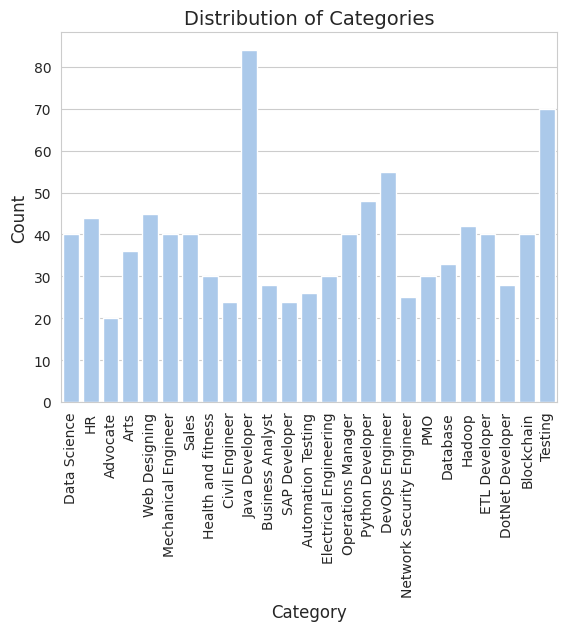

In [14]:
# Set the style
sns.set_style("whitegrid")

# Set the color palette
sns.set_palette("pastel")

# Plot the countplot
sns.countplot(data=df, x='Category')

# Set labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Categories', fontsize=14)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)

# Show the plot
plt.show()


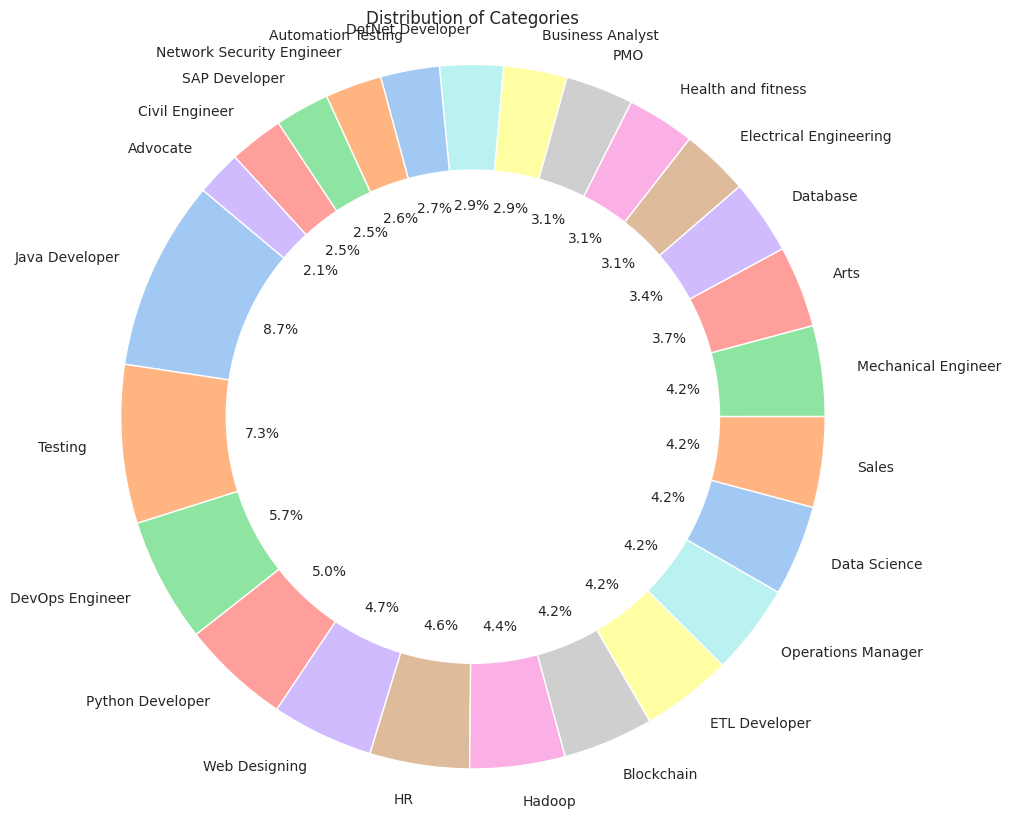

In [15]:

# Get the count of each category
category_counts = df['Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Draw circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Categories')

# Display the pie chart
plt.show()


# Exploring Resume

In [16]:
df['Category'][0]

'Data Science'

In [17]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [18]:
df['Category'][960]

'Testing'

In [19]:
df['Resume'][960]

'COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power Point, MS - Office, C, Protius (PCB Design), Multisim, Micro wind, Matlab, Keil, Latex, Basic I nternet Fundamentals, Software and Hardware Knowledge PROJECT DETAILS Diploma Project: Speed Control of DC Motor Using Heart Beats. Mini Project: Water Gardening System Using Solar Panel. Final Year BE Project: Iris Recognition system.Education Details \r\nJanuary 2016 BE EDUCATION Pune, Maharashtra PUNE University\r\nJanuary 2010 SSC   Maharashtra Board\r\nQuality Engineer \r\n\r\nQuality Engineer - Matrix Technologies\r\nSkill Details \r\nMATLAB- Exprience - 6 months\r\nPCB- Exprience - 6 months\r\nPCB DESIGN- Exprience - 6 monthsCompany Details \r\ncompany - Matrix Technologies\r\ndescription - \r\ncompany - RB Electronics\r\ndescription - '

# Cleaning Resume

1. URL's
2. HASHTAGS
3. Mentions
4. Special Letters
5. punctions


In [20]:
import re

In [21]:

def clean_resume(text):

    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text)
    # Remove hashtags (words starting with #)
    text = re.sub(r"#\w+", "", text)
    # Remove mentions (words starting with @)
    text = re.sub(r"@\w+", "", text)
    # Remove punctuation and special characters
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"[\n\t\r]", "", text)
    text = re.sub(r"\n", "", text)
    # Convert to lowercase
    text = text.lower()

    return text



In [22]:
clean_resume("""COMPUTER SKILLS & SOFTWARE KNOWLEDGE
MS-Power Point, MS - Office, C, Protius (PCB Design), Multisim, Micro wind, Matlab, Keil, Latex, Basic I nternet Fundamentals, Software and Hardware Knowledge

PROJECT DETAILS
Diploma Project: Speed Control of DC Motor Using Heart Beats.
Mini Project: Water Gardening System Using Solar Panel.
Final Year BE Project: Iris Recognition system.

Education Details
January 2016 BE EDUCATION Pune, Maharashtra PUNE University
January 2010 SSC Maharashtra Board

Quality Engineer

Quality Engineer - Matrix Technologies
Skill Details
MATLAB- Exprience - 6 months
PCB- Exprience - 6 months
PCB DESIGN- Exprience - 6 months
http://videogame.com
Company Details
company - Matrix Technologies
description -
company - RB Electronics
description -
""")

'computer skills software knowledge ms power point ms office c protius pcb design multisim micro wind matlab keil latex basic i nternet fundamentals software and hardware knowledge project details diploma project speed control of dc motor using heart beats mini project water gardening system using solar panel final year be project iris recognition system education details january 2016 be education pune maharashtra pune university january 2010 ssc maharashtra board quality engineer quality engineer matrix technologies skill details matlab exprience 6 months pcb exprience 6 months pcb design exprience 6 months company details company matrix technologies description company rb electronics description '

In [23]:
df['Resume']=df['Resume'].apply(lambda x: clean_resume(x))

In [24]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the

# Words into Categorical Values

- Make the Category columns into Numbers for processing

In [25]:
df1= df.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
le.fit(df['Category'])
df1['Category_num'] = le.transform(df['Category'])
df['Category'] = le.transform(df['Category'])

In [28]:
df.head()

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may 2013 to may 2017 b e uit...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...


# Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
required_text = tfidf.transform(df['Resume'])


In [30]:
required_text

<962x7348 sparse matrix of type '<class 'numpy.float64'>'
	with 164128 stored elements in Compressed Sparse Row format>

Splitting Dataset

In [31]:
from sklearn.model_selection import train_test_split , GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=42)

In [32]:
print(f"X_train { X_train.shape}")
print(f"X_test { X_test.shape}")
print(f"y_train { y_train.shape}")
print(f"y_test { y_test.shape}")


X_train (769, 7348)
X_test (193, 7348)
y_train (769,)
y_test (193,)


#Train Model

##KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [34]:
# Define a grid of Hyperparameters to Search over
param_grid = {'n_neighbors' : [3,5,7,8]}


In [35]:
knn_classifier = KNeighborsClassifier()


In [36]:
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 8]}, scoring='accuracy')

In [37]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [38]:
# use the best parameters to initilize the classifier
best_k = best_params['n_neighbors']
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

In [39]:
# Train the KNN classifiers with the best parameters
best_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred = best_knn_classifier.predict(X_test)

In [41]:
class_report = classification_report(y_test, y_pred)

In [42]:
# Print best parameters and classification report
print("Best Parameters:", best_params)
print("Best Score (CV Accuracy):", best_score)
print("Classification Report:")
print(class_report)

Best Parameters: {'n_neighbors': 3}
Best Score (CV Accuracy): 0.9740089975384093
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.

#Pickling Data

In [43]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(best_knn_classifier,open('best_knn_classifier.pkl', 'wb'))

In [44]:
Sample_resume="""


CARTER ANDRADE
Manual Tester
+1-115-873-4179
kimberlyjhnsn@gmail.com
linkedin.com/in/kimberly.johnson9
Los Angeles, CA
A hard-working manual tester who is attentive to detail and has excellent time-management skills. Has achieved a 99% success rate in identifying bugs and suggesting ways to fix them. Experienced in working with different PM methodologies and database software.
Manual Tester
Wolf Inc

2019 - Present

Los Angeles, CA
Wolf Inc is the third-largest software development company in the US
•
Working closely with the software development team to ensure bug-free applications
•
Actively participating in all phases of product testing, including planning and delivery recommendations
•
Writing extensive bug reports
•
Providing guidance to interns and junior manual testers
•
Participating in the QA processes of more than 14 companies annually
Junior Manual Tester (QA)
Schmeler

2017 - 2019

Singapore, Singapore
Schmeler is a Singapore-based company which provides QA services to clients and partners
•
Provided numerous recommendations on ways to improve the user experience
•
Secured more than 20 successful product releases
•
Was individually responsible for testing the apps of 11 clients
•
Identified 97% of issues related to my personal clients' apps in 2018
Manual tester - Summer Internship
Padberg

2016 - 2016

San Jose, CA
Padberg is a US-based company that specializes in service gamification
•
Supported senior colleagues by identifying bugs and suggesting improvements
•
Performed manual testing on 4 applications
•
Reported more than 700 issues
Best Manual Tester in 2020
Awarded by: Wolf Inc. for achieving 99% bug-free rate in 2020
Innovative Approach to Manual Testing
Adopted an innovative approach to manual testing by co-leading an interdisciplinary team for a short project
TECH STACK
JDBC
ClickUp
Testrail
Jira
Test Planning
Oracle
SQL
MS Office
Scrum
Lean
Waterfall
Bachelor of Science in Computer Science
University of California, Berkeley

2013 - 2017

Berkeley, CA
Attention to Detail
Completing all tasks while paying attention to even the smallest issues
Strong Work Ethic
Having an immense desire to complete each task in the best way possible
Motivation and Hard Work
Always motivated to learn new things and improve in all areas of life
Manual QA
LevelUp Learning IT Center, 2021
Manual Testing Online Course
FITA Academy, 2018
SEO course
IMT Academy, 2018
ISTQB (Advanced)
ASTQB, 2017
© 2024 Enhancv. All Rights Reserved.
Resume ExamplesTermsPrivacyBlogHelp
Language
Built with love & passion

"""

In [45]:
Sample_resume2 = """
Certainly! Here's a civil engineer resume example with random information:

---

**John Smith**
123 Main Street
Springfield, IL 62701
john.smith@email.com
(555) 123-4567

---

**Objective:**
Detail-oriented Civil Engineer with 5 years of experience in structural design and project management seeking to leverage expertise in delivering high-quality engineering solutions for infrastructure projects. Proven track record of completing projects on time and within budget while maintaining safety standards.

---

**Education:**
- Bachelor of Science in Civil Engineering
  Springfield University, Springfield, IL
  Graduated: May 2015

---

**Professional Experience:**

**Civil Engineer**
Johnson & Associates Engineering Firm, Springfield, IL
July 2015 - Present
- Managed a team of engineers and technicians in the design and construction of various civil engineering projects.
- Conducted structural analysis and design for bridges, highways, and buildings using software such as AutoCAD, SAP2000, and ETABS.
- Prepared detailed project plans, specifications, and cost estimates, ensuring compliance with industry standards and regulations.
- Coordinated with clients, contractors, and government agencies to obtain permits and approvals for project implementation.
- Conducted site visits to monitor construction progress, resolve issues, and ensure adherence to design specifications and safety standards.
- Implemented quality control measures to ensure the integrity and durability of structures.

**Assistant Civil Engineer**
Springfield Civil Engineering Services, Springfield, IL
May 2014 - June 2015
- Assisted senior engineers in the design and analysis of structural components for residential and commercial projects.
- Conducted site surveys and collected data for feasibility studies and project planning.
- Prepared technical reports, drawings, and documentation for project proposals and presentations.
- Collaborated with architects, contractors, and subcontractors to coordinate project activities and resolve design conflicts.
- Participated in construction meetings and provided technical support to field personnel.

---

**Skills:**
- Proficient in structural analysis and design software such as AutoCAD, SAP2000, ETABS, and Revit.
- Strong knowledge of civil engineering principles, codes, and standards.
- Excellent project management skills, including scheduling, budgeting, and resource allocation.
- Effective communication skills, both verbal and written, with the ability to convey complex technical concepts to non-technical stakeholders.
- Detail-oriented with a focus on quality and accuracy.

---

**Certifications:**
- Professional Engineer (PE) license, Illinois, 2017

---

**References:**
Available upon request.

---

Feel free to adjust any details or add more sections as needed!
"""

In [46]:
import pickle


clf = pickle.load(open('best_knn_classifier.pkl', 'rb'))

#clean the Input Resume with Cleaned_resume Function
# pass the sample resume
cleaned_resume= clean_resume(Sample_resume2)

#transformed the cleaned resume using the trained tfidvectorizer

input_features = tfidf.transform([cleaned_resume])

# make the predictions using the loaded classifier

prediction_id = clf.predict(input_features)[0]


print(prediction_id)
filtered_df = df1[df1['Category_num'] == prediction_id]
category_value = filtered_df['Category'].iloc[0]
print("Given Resume is for :", category_value)

5
Given Resume is for : Civil Engineer
